# PRAKTIKUM MINGGU KE 8 PART 1

## praktik 1 Segmentasi Menggunakan Thresholding Global dan Otsu

- menerapkan metode thresholding global yang menentukan satu nilai ambang batas atau threshold (T) kemudian diklasifikasikan berdasarkan intestitas, apabila intensitas pixel lebih dari T maka dianggap objek, dan dibawah T dianggap background
- metode otsu yang dimana metode ini merupakan thresholding otomatis untuk menentukan nilai threshold nya.

praktikum ini bertujuan untuk membandingkan hasil dari thresholding manual dengan metode otsu

### Kode program

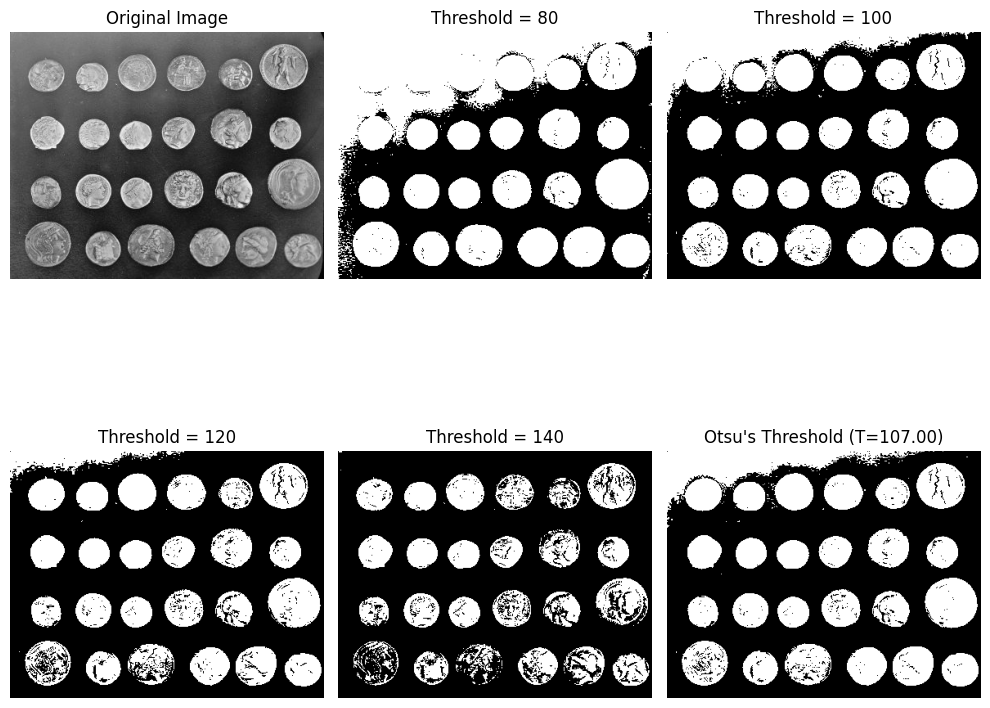

Nilai threshold Otsu yang ditemukan: 107


In [9]:
import matplotlib.pyplot as plt
from skimage import data, filters

# 1. Memuat citra (contoh: coins)
image_coins = data.coins()  # Citra sudah grayscale

# 2. Thresholding Global (manual) untuk beberapa nilai ambang
thresh_1 = 80
thresh_2 = 100
thresh_3 = 120
thresh_4 = 140

binary_1 = image_coins > thresh_1
binary_2 = image_coins > thresh_2
binary_3 = image_coins > thresh_3
binary_4 = image_coins > thresh_4

# 3. Thresholding Otsu
thresh_otsu = filters.threshold_otsu(image_coins)
binary_otsu = image_coins > thresh_otsu

# 4. Visualisasi Hasil dalam grid 3x2
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image_coins, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_1, cmap=plt.cm.gray)
ax[1].set_title(f'Threshold = 80')
ax[1].axis('off')

ax[2].imshow(binary_2, cmap=plt.cm.gray)
ax[2].set_title(f'Threshold = 100')
ax[2].axis('off')

ax[3].imshow(binary_3, cmap=plt.cm.gray)
ax[3].set_title(f'Threshold = 120')
ax[3].axis('off')

ax[4].imshow(binary_4, cmap=plt.cm.gray)
ax[4].set_title(f'Threshold = 140')
ax[4].axis('off')

ax[5].imshow(binary_otsu, cmap=plt.cm.gray)
ax[5].set_title(f"Otsu's Threshold (T={thresh_otsu:.2f})")
ax[5].axis('off')

plt.tight_layout()
plt.show()

# Menampilkan nilai threshold Otsu
print(f"Nilai threshold Otsu yang ditemukan: {thresh_otsu}")


### Perbedaan hasil segmentasi antara thresholding manual dan Otsu
dari hasil percobaan menggunakan thresholding manual dengan nilai T yang berbeda diantaranya 80, 100, 120, 140 dibandingkan dengan metode Otsu, dari yang terlihat yang mampu memisahkan objek koin dari latar belakang yang paling baik yaitu:
- thresholding manual dengan nilai T 120 dan 140
- dengan metode otsu walaupun background masih belum tertutup semua

apakah otsu lebih baik dari thresholding manual? itu tergantung, metode otsu membantu untuk menentukan titik awal thresholding yang cocok kemudian bisa dimaksimalkan dengan thresholding manual.


## Praktik 2 Segmentasi Menggunakan Region Growing

**Region Growing** dimuali dengan satu atau lebih piksel benih atau *seed*. kemudian akan mengecek piksel-piksel tetangganya (neighbor), jika piksel neighbor memenuhi kriteria kesamaan misal dibawah threshold tertentu, piksel tersebut masuk region. proses ini berlanjut hingga piksel tidak cocok dengan region manapun

praktikum ini akan menggunakan fungsi flood dari skimage.segmentation

### percobaan dengan piksel benih (50, 150) dengan tolerance 10

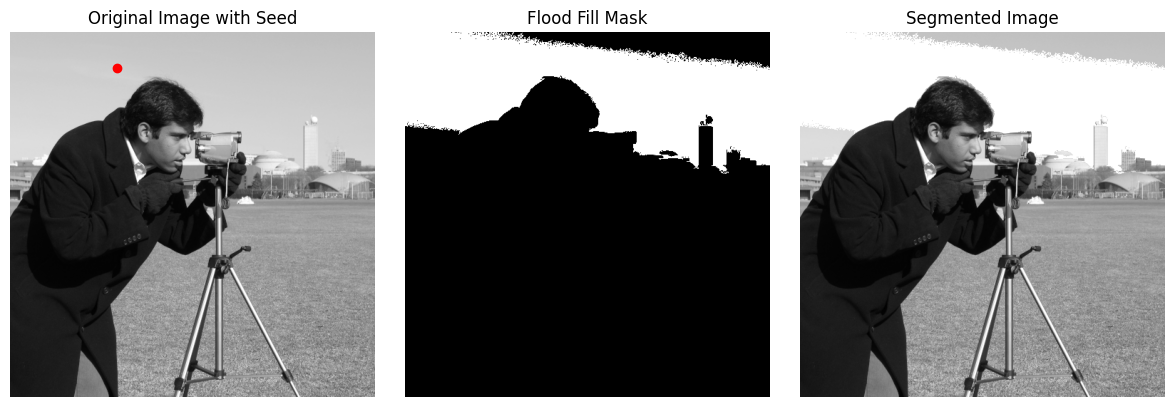

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation

# Memuat citra grayscale
image_camera = data.camera()

# Titik awal (seed) untuk region growing
seed_point = (50, 150)

# Flood fill dengan toleransi perbedaan intensitas
flood_mask = segmentation.flood(image_camera, seed_point, tolerance=10)

# Tandai area hasil segmentasi dengan warna putih
segmented_image = np.copy(image_camera)
segmented_image[flood_mask] = 255

# Visualisasi hasil
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(image_camera, cmap=plt.cm.gray)
ax[0].plot(seed_point[1], seed_point[0], 'ro')  # Titik seed
ax[0].set_title('Original Image with Seed')
ax[0].axis('off')

ax[1].imshow(flood_mask, cmap=plt.cm.gray)
ax[1].set_title('Flood Fill Mask')
ax[1].axis('off')

ax[2].imshow(segmented_image, cmap=plt.cm.gray)
ax[2].set_title('Segmented Image')
ax[2].axis('off')

plt.tight_layout()
plt.show()


### percobaan dengan piksel benih (150, 150) dengan tolerance 100

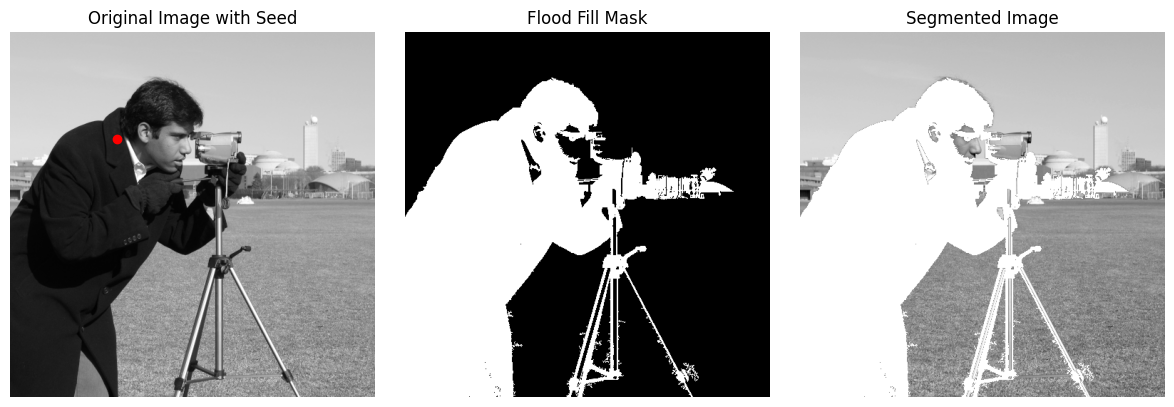

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation

# Memuat citra grayscale
image_camera = data.camera()

# Titik awal (seed) untuk region growing
seed_point = (150, 150)

# Flood fill dengan toleransi perbedaan intensitas
flood_mask = segmentation.flood(image_camera, seed_point, tolerance=100)

# Tandai area hasil segmentasi dengan warna putih
segmented_image = np.copy(image_camera)
segmented_image[flood_mask] = 255

# Visualisasi hasil
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(image_camera, cmap=plt.cm.gray)
ax[0].plot(seed_point[1], seed_point[0], 'ro')  # Titik seed
ax[0].set_title('Original Image with Seed')
ax[0].axis('off')

ax[1].imshow(flood_mask, cmap=plt.cm.gray)
ax[1].set_title('Flood Fill Mask')
ax[1].axis('off')

ax[2].imshow(segmented_image, cmap=plt.cm.gray)
ax[2].set_title('Segmented Image')
ax[2].axis('off')

plt.tight_layout()
plt.show()


### pengaruh parameter tolerance terhadap region
algoritma flood akan mengisi region dari titik awal atau piksel benih kemudian akan memeriksa piksel sebelahya tergantung dari toleransi threshold, semakin kecil threshold maka toleransi piksel yang dianggap region harus semakin mirip

## Praktik 3 Segmentasi Citra Berwarna Menggunakan K-Means

metode ini mengelompokan piksel berdasarkan dari fitur seperti warna dan intensitas ke dalam sejumlah kelompok atau *cluster*

pada praktikum ini menggunakan K-Means Clustering yang dimana merupakan algoritma cluster yang populer untuk membagi berdasarkan jumlah klaster yang akan dibuat. konsepnya hampir sama dengan region yaitu memasukkan N piksel atau benih kemudian akan mencari yang terdekat tapi berdasarkan **mean** atau rata rata

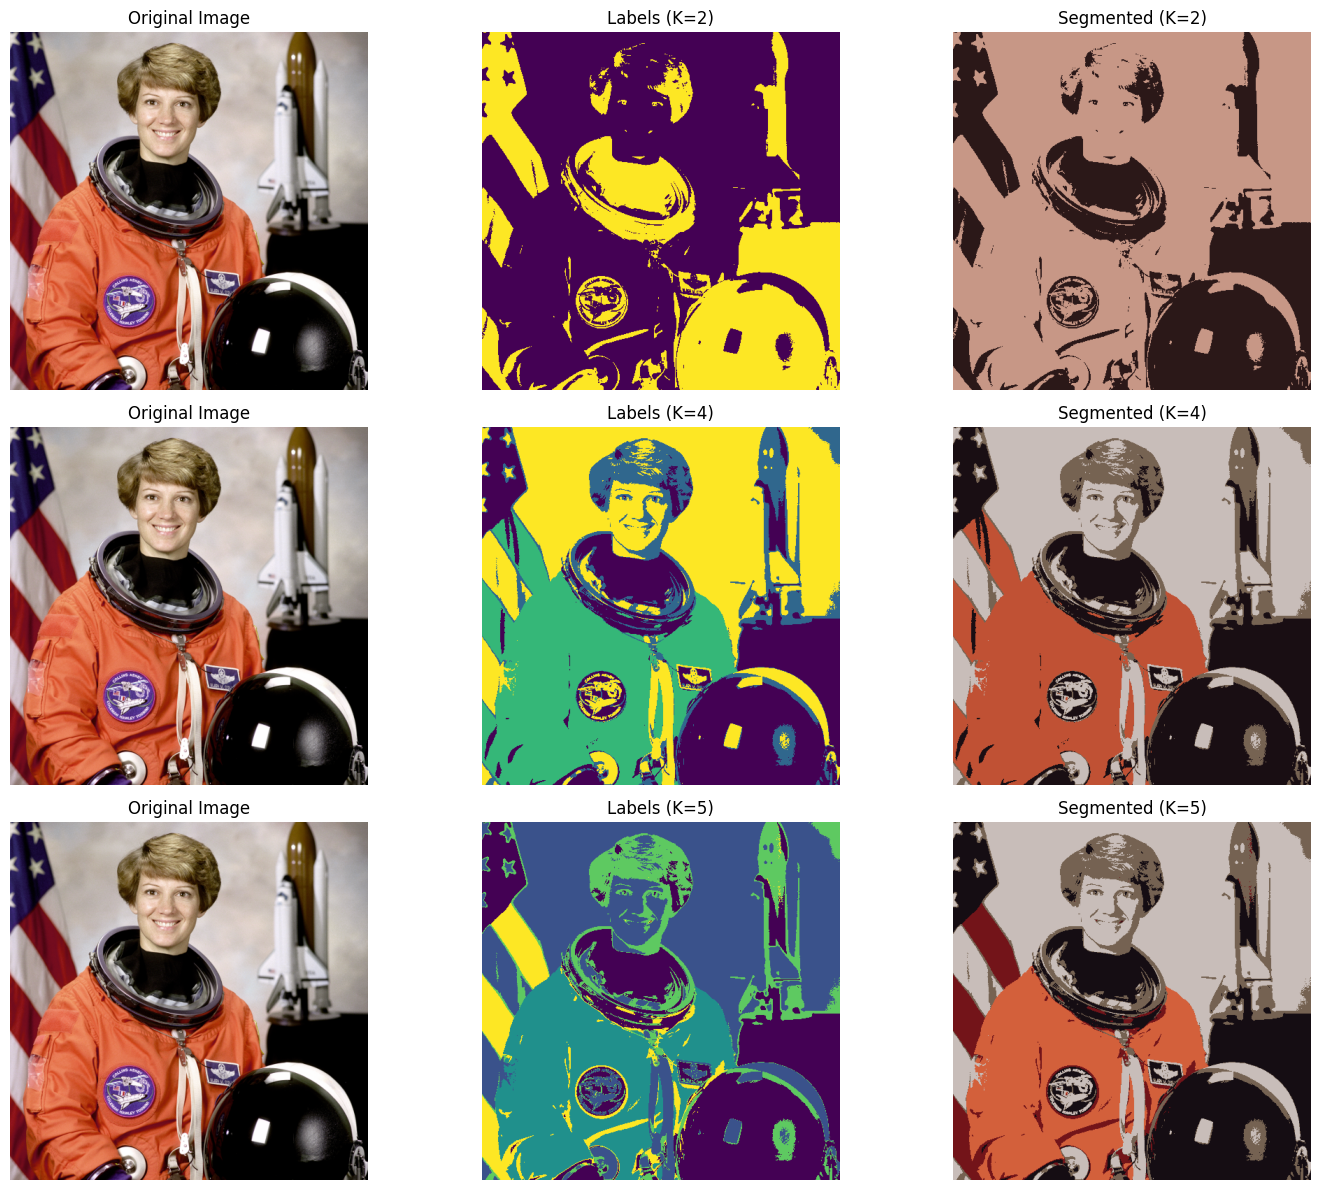

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, lab2rgb
import warnings

# 1. Memuat citra RGB dan konversi ke float [0, 1]
image_astro = data.astronaut()
image_astro_float = image_astro.astype(float) / 255.0

# 2. Konversi ke ruang warna Lab
image_lab = rgb2lab(image_astro_float)
rows, cols, dims = image_lab.shape
pixel_features = image_lab.reshape(rows * cols, dims)

# 3. Daftar jumlah klaster yang ingin diuji
cluster_values = [2, 4, 5]

# 4. Persiapan visualisasi
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.ravel()

for i, n_clusters in enumerate(cluster_values):
    # Terapkan K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        pixel_labels = kmeans.fit_predict(pixel_features)

    segmented_labels = pixel_labels.reshape(rows, cols)

    # Buat citra hasil segmentasi berdasarkan pusat klaster
    segmented_image_lab = np.zeros_like(image_lab)
    centers_lab = kmeans.cluster_centers_
    for k in range(n_clusters):
        mask_k = (segmented_labels == k)
        segmented_image_lab[mask_k] = centers_lab[k]

    segmented_image_rgb = lab2rgb(segmented_image_lab)

    # Plot hasil
    axes[i * 3 + 0].imshow(image_astro)
    axes[i * 3 + 0].set_title(f'Original Image')
    axes[i * 3 + 0].axis('off')

    axes[i * 3 + 1].imshow(segmented_labels, cmap='viridis')
    axes[i * 3 + 1].set_title(f'Labels (K={n_clusters})')
    axes[i * 3 + 1].axis('off')

    axes[i * 3 + 2].imshow(segmented_image_rgb)
    axes[i * 3 + 2].set_title(f'Segmented (K={n_clusters})')
    axes[i * 3 + 2].axis('off')

plt.tight_layout()
plt.show()


### Apakah Jumlah Kluster mempengaruhi hasil segmentasi?
Ya, dari percobaan diatas menggunakan 3 jumlah cluster yang berbeda yaitu 2, 4, dan 5 terlihat dari hasil segmentasinya berbeda terutama pada jumlah cluster 2 dan mulai 4, 5 segementasi lebih terlihat detail, objek objek kecil ikut dikelompokan. 

kemudian penggunaan ruang warna lab memberikan hasil yang lebih akurat daripada hanya menggunakan ruang warna RGB.


## Praktik 4 Segmentasi Berbasis Edge Computing Menggunakan Watershed

Praktikum ini menggunakan algoritma Watershed yang umum digunakan untuk memisahkan objek yang saling bersentuhan atau *intersection*. Cara kerja algoritma ini mengolah citra seperti relief topografi dan mengisi cekungan dengan air. kemudian akan digunakan gradien citra sebagai input topografi 

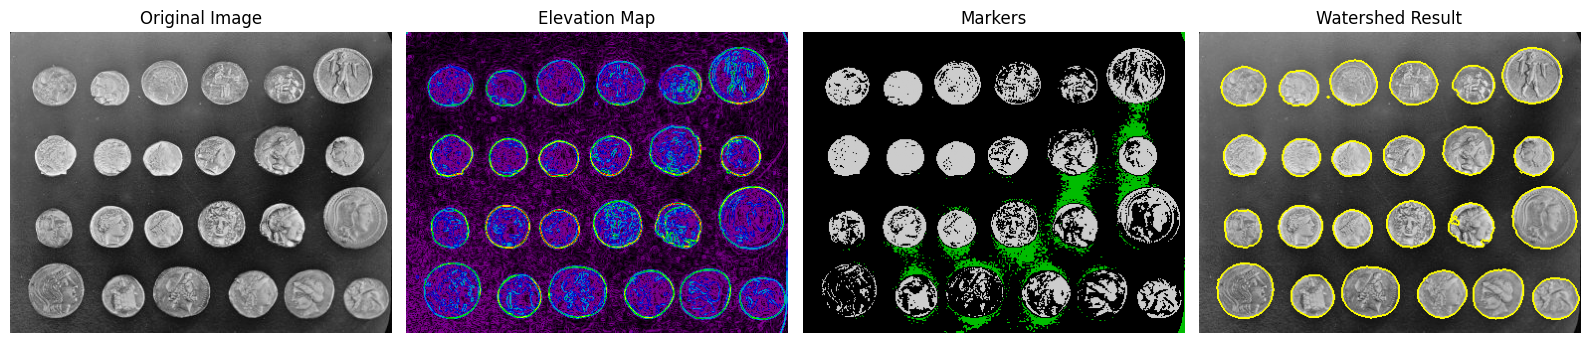

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, segmentation, morphology, measure
from scipy import ndimage as ndi

# 1. Load citra grayscale (contoh: koin)
image_coins = data.coins()

# 2. Hitung gradien Sobel sebagai peta elevasi
elevation_map = filters.sobel(image_coins)

# 3. Tentukan marker awal: latar belakang dan objek
markers = np.zeros_like(image_coins)
markers[image_coins < 30] = 1   # Background
markers[image_coins > 150] = 2  # Objek (koin)

# 4. Terapkan algoritma watershed
segmentation_watershed = segmentation.watershed(elevation_map, markers)

# 5. Tandai batas segmentasi pada citra asli
segmented_colored = segmentation.mark_boundaries(image_coins, segmentation_watershed)

# 6. Visualisasi hasil
fig, axes = plt.subplots(ncols=4, figsize=(16, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image_coins, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(elevation_map, cmap=plt.cm.nipy_spectral)
ax[1].set_title('Elevation Map')
ax[1].axis('off')

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Markers')
ax[2].axis('off')

ax[3].imshow(segmented_colored)
ax[3].set_title('Watershed Result')
ax[3].axis('off')

plt.tight_layout()
plt.show()


### Hasil dari algortima watershed menggunakan gradien dan marker untuk memisahkan objek
jadi alurnya yaitu :
1. yang pertama adalah gradien disini menggunakan sobel, ini digunakan untuk menggambarkan perubahan intensitas warna atau kontras pada gambar, sehingga bisa menunjukan batas atau tepi dari objek
2. pemilihan marker disini sebagai titik awal untuk menentukan area yang dianggap objek atau background sebagai contoh pada program, background diberi nilai = 1, objek = 2

3. Nah kemudian bagaimana marker bisa mempengaruhi hasil segementasi itu karena marker ditempatkan dengan benar, watershed akan memisahkan objek dan background dengan baik mengikuti tepi yang ditentukan oleh gradien, sedangkan jika marker *tidak tepat atau tidak cukup* algoritma akan gagal memisahkan objek dengan benar karena dapat menyebabkan air menggenang ditempat yang salah atau tumpang tindih sehingga akibatnya **segmentasi tidak akurat**

## Praktik 5 Perbandingan Visual Hasil Segmentasi

praktikum ini bertujuan membandingkan hasil dari beberapa segmentasi yang telah dipelajari dari citra yang sama untuk melihat perbedaan, kelebihan dan kekurangan masing masing visual

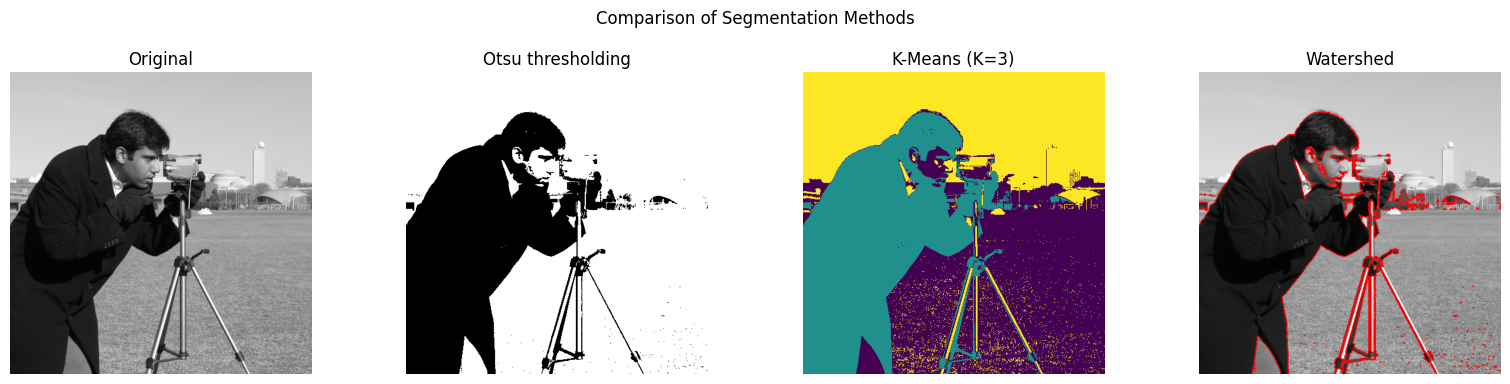

In [36]:
import matplotlib.pyplot as plt
from skimage import data, filters, segmentation, img_as_float, color
from sklearn.cluster import KMeans
import numpy as np
import warnings

# 1. Ambil citra grayscale (contoh: kamera)
image = data.camera()
image_float = img_as_float(image)

# 2. Segmentasi dengan beberapa metode

# a) Thresholding Otsu
thresh_otsu = filters.threshold_otsu(image)
binary_otsu = image > thresh_otsu

# b) K-Means clustering (K=3)
rows, cols = image.shape
pixel_features = image_float.reshape(rows * cols, 1)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    pixel_labels = kmeans.fit_predict(pixel_features)
segmented_kmeans_labels = pixel_labels.reshape(rows, cols)

# c) Watershed dengan marker dari Otsu
elevation_map = filters.sobel(image)
markers = np.zeros_like(image)
markers[image < thresh_otsu] = 1
markers[image > thresh_otsu] = 2
segmentation_watershed = segmentation.watershed(elevation_map, markers)

# 3. Visualisasi hasil segmentasi
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(binary_otsu, cmap=plt.cm.gray)
ax[1].set_title('Otsu thresholding')

ax[2].imshow(segmented_kmeans_labels, cmap='viridis')
ax[2].set_title(f'K-Means (K={n_clusters})')

# Tampilkan batas segmentasi Watershed
segmented_watershed_colored = segmentation.mark_boundaries(image_float, segmentation_watershed, color=(1, 0, 0))
ax[3].imshow(segmented_watershed_colored)
ax[3].set_title('Watershed')

for a in ax:
    a.axis('off')

plt.suptitle('Comparison of Segmentation Methods')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### hasil perbandingan tiga metode
- dari ketika metode tersebut dari yang terlihat yang paling baik dalam memisahkan objek adalah KMeans karena dapat mengkategorikan 3 objek dengan rapi dan jelas
- selanjutnya metode yang menghasilkan region paling halus dan detail adalah watershed karena mengelompokan berdasarkan tepi

- **kelebihan dan kekurangan masing masing metode:**
1. Otsu thresholding kelebihnnya adalah sederhana dan cepat serta tidak memerlukan parameter tambahan yang ribet. kekurangannya adalah kurang efektif jika intensitas gambar tidak merata dan hanya menghasilkan segmentasi biner atau dua kelas
2. Kmeans Clustering memiliki kelebihan dapat mengelompokkan menjadi banyak kelas tergantung jumlah yang diinginkan, mampu memisahkan objek berdasarkan kemiripan intensitad dan warna, dan hasil lebih rapi dan jelas jika jumlah cluster yang dipilih tepat. Kekurangannya yaitu tadi jika jumlah klaster yang ditentukan tidak tepat maka akan memengaruhi hasil dan rentan terhadap noise
3. algoritma watershed memiliki kelebihan mampu menghasilkan segmentasi yang detail dan halus mengikuti kontur objek, cocok untuk objek yang saling bersentuhan. kekurangannya yaitu sangat rentan terhadap noise, hasil tergantung dari pemilihan marker, serta tahapan yang paling ribet atau komplek

## Penugasan 1: Eksperimen thresholding

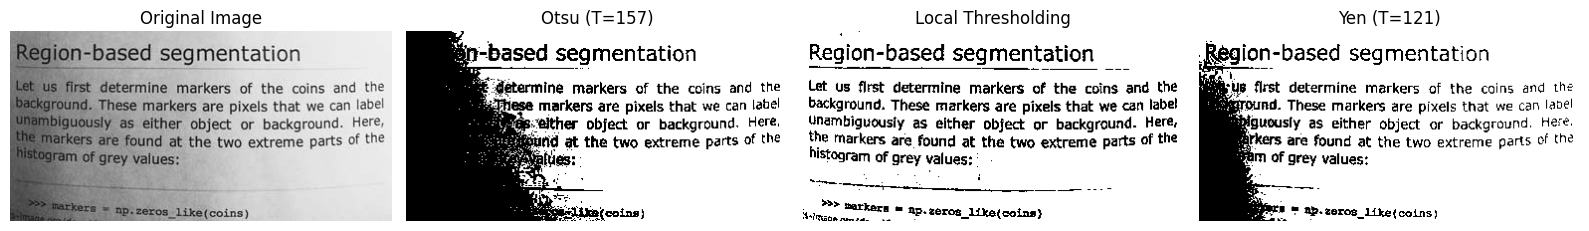

In [43]:
import matplotlib.pyplot as plt
from skimage import data, filters
from skimage.filters import threshold_otsu, threshold_local, threshold_yen

# 1. Memuat citra
image = data.page()  # Sudah dalam grayscale

# 2. Metode Thresholding
# a) Otsu
thresh_otsu = threshold_otsu(image)
binary_otsu = image > thresh_otsu

# b) Local Thresholding
block_size = 35
thresh_local = threshold_local(image, block_size, offset=10)
binary_local = image > thresh_local

# c) Yen
thresh_yen = threshold_yen(image)
binary_yen = image > thresh_yen

# 3. Visualisasi Hasil
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
titles = ['Original Image', f'Otsu (T={thresh_otsu})', 'Local Thresholding', f'Yen (T={thresh_yen:.0f})']
images = [image, binary_otsu, binary_local, binary_yen]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


### Hasil dan Analisis

1. Otsu
- Menentukan nilai ambang global secara otomatis.
- Cukup baik, namun jika pencahayaan pada citra tidak merata, hasil bisa kurang akurat.

2. Threshold Lokal
- Menghitung nilai ambang secara lokal, cocok untuk dokumen dengan pencahayaan tidak merata.
- Memberikan hasil yang lebih halus dan merata, terutama untuk teks yang tipis.

3.  Yen
- Cenderung memberikan threshold yang lebih tinggi.
- Dapat menghasilkan segmentasi lebih terang, namun bisa menghilangkan beberapa detail.

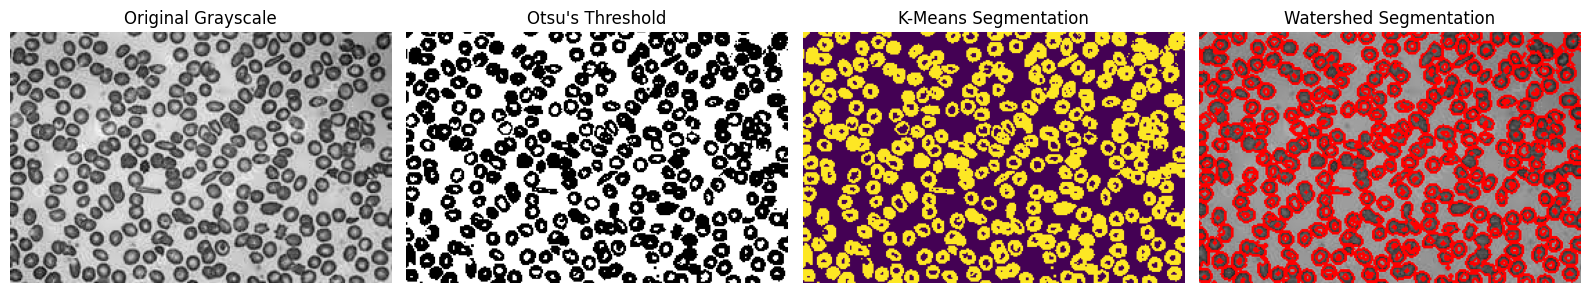

In [49]:
import matplotlib.pyplot as plt
from skimage import io, color, filters, segmentation, img_as_float
from sklearn.cluster import KMeans
import numpy as np
import warnings

# --- 1. Baca gambar dari file ---
image_path = 'sel.jpeg' 
image_rgb = io.imread(image_path)

# --- 2. Konversi ke grayscale dan float ---
if image_rgb.ndim == 3:
    image_gray = color.rgb2gray(image_rgb)  # jadi float [0-1]
else:
    image_gray = image_rgb / 255.0  

image_float = img_as_float(image_gray)

# --- 3. Thresholding Otsu ---
thresh_otsu = filters.threshold_otsu(image_gray)
binary_otsu = image_gray > thresh_otsu

# --- 4. KMeans Clustering ---
rows, cols = image_gray.shape
pixel_features = image_gray.reshape(rows * cols, 1)
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    pixel_labels = kmeans.fit_predict(pixel_features)
segmented_kmeans_labels = pixel_labels.reshape(rows, cols)

# --- 5. Watershed segmentation ---
elevation_map = filters.sobel(image_gray)
markers = np.zeros_like(image_gray, dtype=np.uint8)
markers[image_gray < thresh_otsu] = 1
markers[image_gray > thresh_otsu] = 2
segmentation_watershed = segmentation.watershed(elevation_map, markers)

# --- 6. Visualisasi ---
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
ax = axes.ravel()

ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title('Original Grayscale')

ax[1].imshow(binary_otsu, cmap='gray')
ax[1].set_title("Otsu's Threshold")

ax[2].imshow(segmented_kmeans_labels, cmap='viridis')
ax[2].set_title('K-Means Segmentation')

ax[3].imshow(segmentation.mark_boundaries(image_gray, segmentation_watershed, color=(1, 0, 0)))
ax[3].set_title('Watershed Segmentation')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()
